In [28]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [29]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
# Check if there any null value in the Dataset
data.isnull == True

False

In [31]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
data.shape

(25, 2)

In [33]:
X = data.iloc[:, :-1].values
#print(X)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [34]:
Y = data.iloc[:,1].values
#print(Y)
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

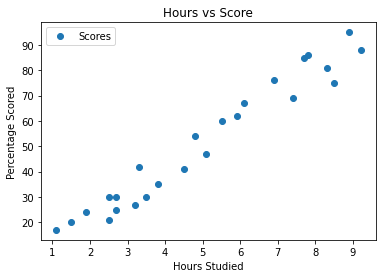

In [35]:
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Score')
plt.show()

In [36]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [37]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


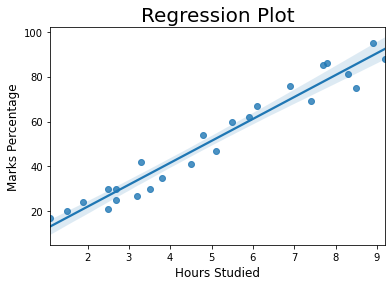

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [38]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#### Training the model

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)


In [40]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


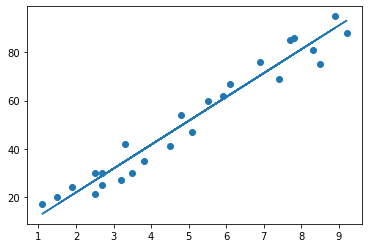

In [41]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

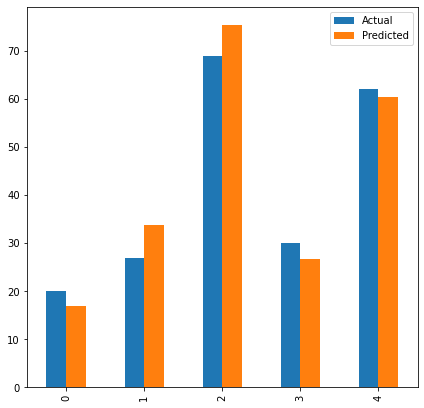

In [46]:
df.plot(kind = 'bar', figsize = (7,7))
plt.show()

In [42]:
pred_y = regressor.predict(X)
prediction = pd.DataFrame({'Hours': [i[0] for i in X], 'Predicted Marks': [k for k in Y]})
prediction

,Hours,Predicted Marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [43]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [44]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


In [49]:
lr = LinearRegression()
lr.fit(X,Y)
print("Train The Model")

Train The Model


In [51]:
l = lr.coef_*X+lr.intercept_

In [54]:
print("Traning Score",lr.score(X_train,Y_train))
print("Traning Score",lr.score(X_test,Y_test))

Traning Score 0.9512837351709387
Traning Score 0.9491748734859172


In [55]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lr.predict(test)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours = 9.25
Predicted Score = 92.9098547701573


In [57]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(Y_test,Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Explained Variance Score: 0.9482829156738147
